In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

In [15]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

In [16]:
# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42)

In [18]:

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Building the ANN model

In [19]:
# Initialize the model
model = Sequential()

In [20]:
# Add input layer and first hidden layer
model.add(Dense(8, input_shape=(X_train.shape[1],), activation='relu'))

# Add second hidden layer
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(3, activation='softmax'))  # 3 because there are 3 classes in the Iris dataset

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model training

In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=10)


Epoch 1/100
14/14 [==============================] - 2s 33ms/step - loss: 1.0992 - accuracy: 0.3259 - val_loss: 0.9783 - val_accuracy: 0.4000
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 1.0458 - accuracy: 0.3333 - val_loss: 0.9357 - val_accuracy: 0.4000
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 1.0003 - accuracy: 0.3333 - val_loss: 0.8967 - val_accuracy: 0.4667
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.9636 - accuracy: 0.3556 - val_loss: 0.8607 - val_accuracy: 0.6000
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.9311 - accuracy: 0.4370 - val_loss: 0.8303 - val_accuracy: 0.6667
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.9036 - accuracy: 0.4963 - val_loss: 0.8028 - val_accuracy: 0.5333
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.8785 - accuracy: 0.5407 - val_loss: 0.7778 - val_accuracy: 0.5333
Epoch 8/100


Evaluating the model

In [23]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

1/1 [==============================] - 0s 47ms/step - loss: 0.0841 - accuracy: 1.0000
Test Accuracy: 1.00


Making prediction

In [24]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {test_accuracy:.2f}')

1/1 [==============================] - 0s 170ms/step
Accuracy: 1.00


Visualizing the training process

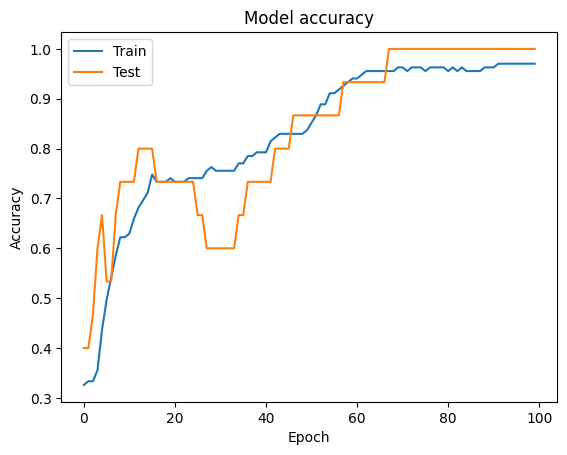

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


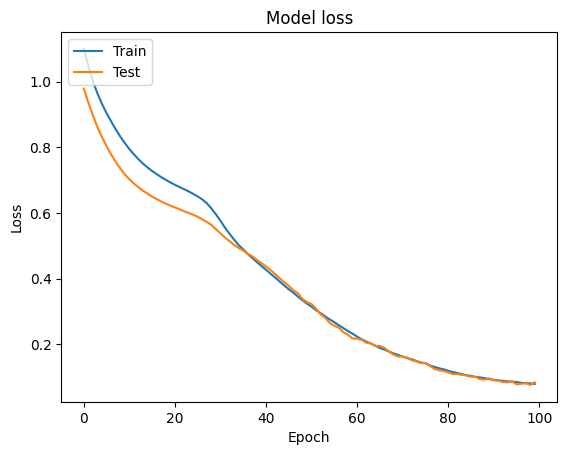

In [26]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()